# Modules for Import

In [1]:
import pandas as pd

# !pip install pandasai
# !pip install langchain_community
# !pip install langchain_openai

import os
# from pandasai import Agent
from pandasai import SmartDataframe
from pandasai.llm import OpenAI
# from pandasai.helpers.openai_info import get_openai_callback
import logging
import openai

# from langchain_openai.chat_models import ChatOpenAI

# Create a custom logging configuration
logging.basicConfig(level=logging.CRITICAL)

# Read NBA Stats Data CSV from disk 

In [2]:
# Load your data into a pandas DataFrame
df = pd.read_csv('nba-stats-data.csv', low_memory=False)
# set season (year) as main DF index to allow for time series analysis of player data
df = df.reset_index().set_index('season')
df.index = pd.to_datetime(df.index, format='%Y').to_period('Y')
df = df.sort_index(axis=0)
df.head()

,index,assists,blocks,comment,defReb,fga,fgm,fgp,fta,ftm,...,DOB,age,feet,meters,position,active,jersey_number,years_pro,rookie_year,pounds
season,,,,,,,,,,,,,,,,,,,,,
2015,34,0.0,1.0,NaN,1.0,3.0,2.0,66.7,2.0,1.0,...,1991-07-01,33.0,"6""10",2.08,F-C,True,33.0,8.0,2013.0,240.0
2015,35,0.0,1.0,NaN,1.0,3.0,2.0,66.7,2.0,1.0,...,1991-07-01,33.0,"6""10",2.08,F-C,True,33.0,8.0,2013.0,240.0
2015,36,2.0,0.0,NaN,7.0,7.0,3.0,42.9,2.0,2.0,...,1988-07-16,36.0,"6""7",2.01,F,True,1.0,9.0,2012.0,237.0
2015,37,0.0,0.0,NaN,3.0,4.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015,38,1.0,1.0,NaN,5.0,5.0,3.0,60.0,6.0,2.0,...,1992-03-22,33.0,"7""3",2.21,C,False,40.0,1.0,2015.0,265.0


# Analysis: Speak to the Data!

In [29]:
df.columns

Index(['index', 'assists', 'blocks', 'comment', 'defReb', 'fga', 'fgm', 'fgp',
       'fta', 'ftm', 'ftp', 'min', 'offReb', 'pFouls', 'plusMinus', 'points',
       'pos', 'steals', 'totReb', 'tpa', 'tpm', 'tpp', 'turnovers',
       'player_id', 'player_name', 'team_code', 'team_name', 'team_id',
       'game_id', 'affiliation', 'college', 'firstname', 'id', 'lastname',
       'country', 'DOB', 'age', 'feet', 'meters', 'position', 'active',
       'jersey_number', 'years_pro', 'rookie_year', 'pounds'],
      dtype='object')

## Set Open AI API Key

In [48]:
os.environ["OPENAI_API_KEY"] = "*******"

llm = OpenAI(model="gpt-3.5-turbo", openai_api_key=openai.api_key)

# Set Large Language Model & other DF confirgurations

In [49]:
df_nba = SmartDataframe(df, config={"llm": llm, "conversational": True, "verbose": True})

# Chat with (query data)

In [6]:
df_nba.chat("Which are the top 20 player_names by assists?")

'The top 20 players by assists are: Rajon Rondo, Russell Westbrook, Russell Westbrook, Russell Westbrook, Russell Westbrook, Tyrese Haliburton, Russell Westbrook, Russell Westbrook, Trae Young, Rajon Rondo, Russell Westbrook, Russell Westbrook, Russell Westbrook, Russell Westbrook, Russell Westbrook, James Harden, Russell Westbrook, Russell Westbrook, Elfrid Payton, Russell Westbrook'

In [7]:
df_nba.chat("Which are the top 10 player_names by assists?")

,player_name
season,
2017,Rajon Rondo
2018,Russell Westbrook
2020,Russell Westbrook
2018,Russell Westbrook
2020,Russell Westbrook
2023,Tyrese Haliburton
2016,Russell Westbrook
2016,Russell Westbrook
2024,Trae Young


In [8]:
df_nba.chat("Which are the top 5 player_names group by points?")

,points
player_name,
Kevin Durant,35170.0
Russell Westbrook,33398.0
Kyrie Irving,29574.0
Andre Drummond,27846.0
Nikola Vucevic,27172.0


In [9]:
df_nba.chat("Which are the top 5 player_names group by blocks?")

,player_name,blocks
761,JaVale McGee,2648.0
78,Andre Drummond,2478.0
1351,Mason Plumlee,1866.0
1162,Kevin Durant,1640.0
1662,Rudy Gobert,1586.0


In [10]:
df_nba.chat("Which are the top 5 player_names group by assists?")

,player_name,assists
1664,Russell Westbrook,13532.0
1209,Kyle Lowry,9276.0
593,Eric Bledsoe,7404.0
841,James Harden,6952.0
1215,Kyrie Irving,6658.0


In [11]:
df_nba.chat("Which are the top 5 distinct player_names by pounds?")

,player_name,pounds
season,,
2015,Boban Marjanovic,290.0
2015,Jusuf Nurkic,290.0
2015,Nikola Jokic,284.0
2019,Zion Williamson,284.0
2015,Joel Embiid,280.0


In [12]:
df_nba.chat("Which are the top 5 distinct player_names by meters?")

,player_name,meters
season,,
2015,Edy Tavares,2.21
2015,Kristaps Porzingis,2.21
2015,Boban Marjanovic,2.21
2019,Bol Bol,2.18
2015,Rudy Gobert,2.16


In [13]:
df_nba.chat("Which are the top 5 player_names group by plusMinus?")

,plusMinus
player_name,
Kevin Durant,8420.0
Stephen Curry,5453.0
Kyrie Irving,5234.0
Danny Green,5004.0
Kyle Lowry,4852.0


In [14]:
df_nba.chat("Which are the top 5 player_names by all stats excluding pFouls and turnovers?")

<string>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
<string>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


,index,assists,blocks,defReb,fga,fgm,fgp,fta,ftm,ftp,...,player_id,team_id,game_id,id,age,meters,jersey_number,years_pro,rookie_year,pounds
player_name,,,,,,,,,,,,,,,,,,,,,
Russell Westbrook,373101044,13532.0,534.0,10396.0,27712.0,12152.0,68476.8,9478.0,7020.0,104525.6,...,874752.0,35742,11163800,874752.0,57888.0,3055.20,0.0,20904.0,3228864.0,321600.0
Kyle Lowry,481096796,9276.0,530.0,5582.0,16670.0,7122.0,61007.8,5470.0,4556.0,94909.6,...,500964.0,49560,10451772,500964.0,59748.0,2803.56,10724.0,22980.0,3073192.0,300272.0
Eric Bledsoe,376362837,7404.0,654.0,4980.0,17730.0,7965.0,65280.6,5640.0,4407.0,96492.3,...,93102.0,35598,8487396,93102.0,55230.0,2919.30,7890.0,17358.0,3171780.0,337692.0
James Harden,121821995,6952.0,515.0,4408.0,14255.0,6214.0,34177.2,6897.0,5959.0,67193.1,...,175392.0,11937,5622842,175392.0,28420.0,1591.52,812.0,9744.0,1631308.0,178640.0
Kyrie Irving,66193858,6658.0,582.0,4054.0,22846.0,11004.0,57969.4,4868.0,4374.0,95042.6,...,328860.0,6586,8781624,328860.0,41580.0,2368.80,13860.0,12600.0,2533860.0,245700.0


In [15]:
df_nba.chat("Which are the best players by single game stats?")

<string>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,player_name,assists,blocks,defReb,fga,fgm,fta,ftm,min,offReb,plusMinus,points,steals,totReb,turnovers,total_score
season,,,,,,,,,,,,,,,,
2023,Giannis Antetokounmpo,3.0,1.0,11.0,28.0,20.0,32.0,24.0,37.0,3.0,29.0,64.0,4.0,14.0,4.0,233.0
2023,Joel Embiid,5.0,1.0,9.0,41.0,24.0,23.0,21.0,37.0,9.0,11.0,70.0,1.0,18.0,1.0,233.0
2018,James Harden,4.0,0.0,9.0,38.0,17.0,25.0,22.0,NaN,6.0,19.0,61.0,5.0,15.0,5.0,221.0
2022,Donovan Mitchell,11.0,1.0,5.0,34.0,22.0,25.0,20.0,50.0,3.0,19.0,71.0,0.0,8.0,4.0,219.0
2022,Joel Embiid,8.0,7.0,10.0,28.0,19.0,24.0,20.0,37.0,1.0,25.0,59.0,1.0,11.0,5.0,213.0


'/Users/conorheffron/workspace/data-science-in-python/assignment-1/submission/v2/exports/charts/temp_chart.png'

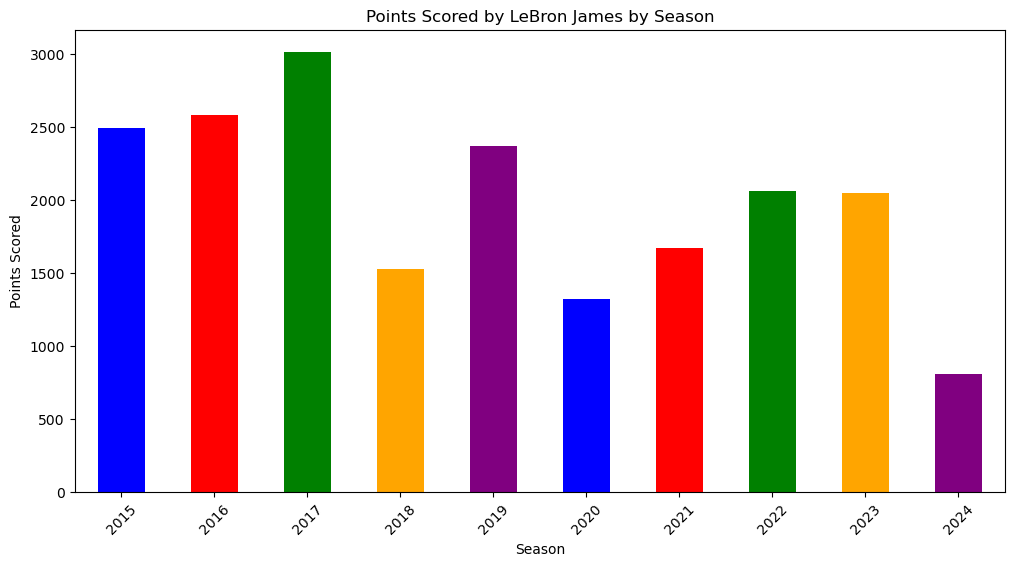

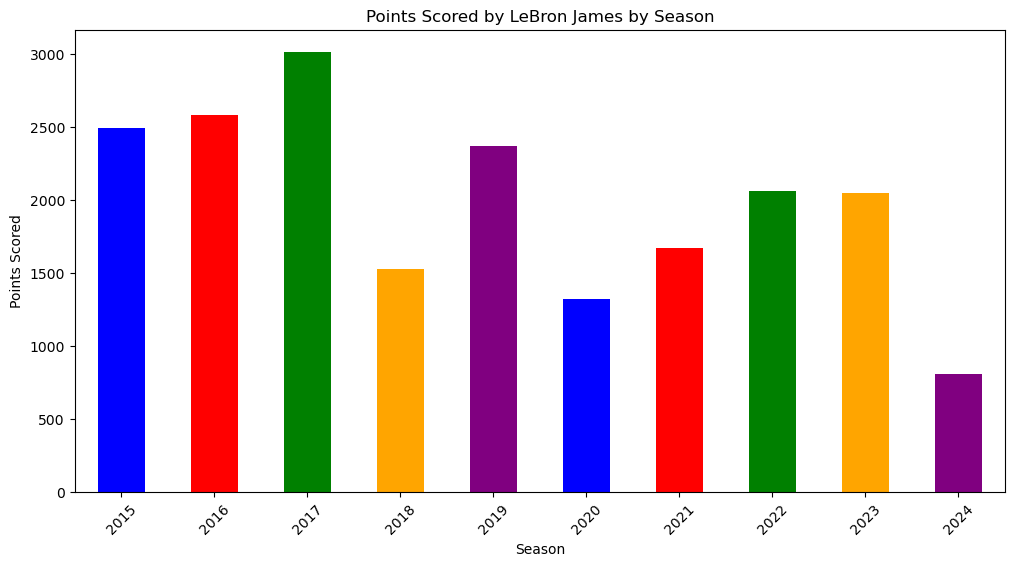

In [50]:
df_nba.chat("Plot points scored by LeBron James showing for each season, using different colors for each bar")

<string>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


'/Users/conorheffron/workspace/data-science-in-python/assignment-1/submission/v2/exports/charts/temp_chart.png'

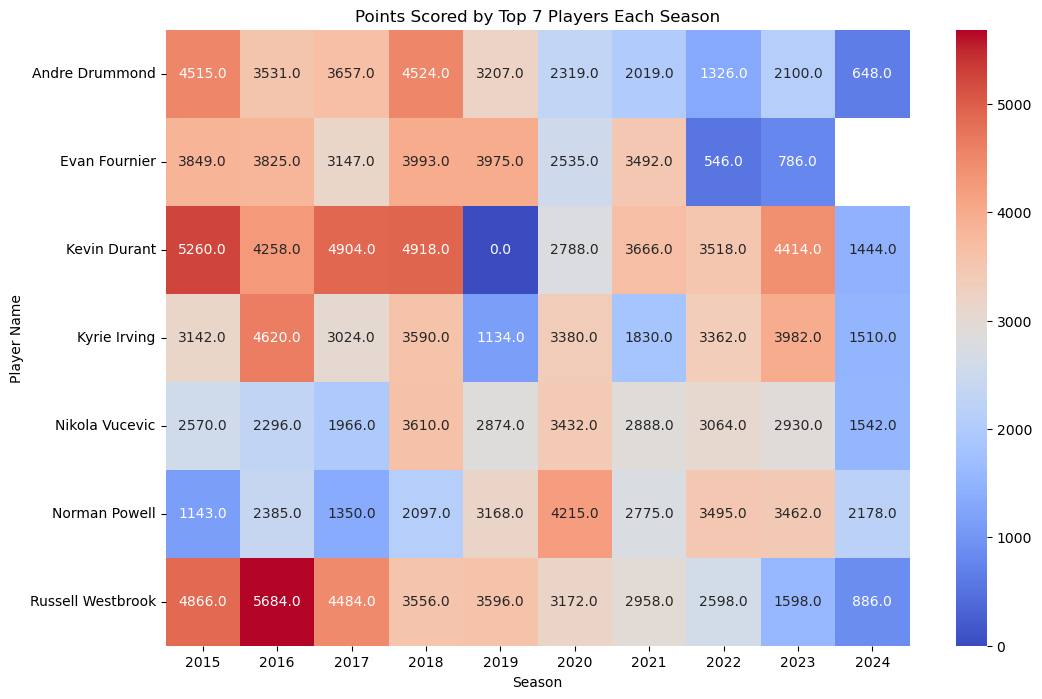

In [17]:
df_nba.chat("Plot heatmap of the best 7 player_names")